<a href="https://colab.research.google.com/github/HSE-LAMBDA/DeepGenerativeModels/blob/master/seminars/seminar-3/kde_gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Gaussian mixture. 1D example

Let's generate mixture of 3 gaussians

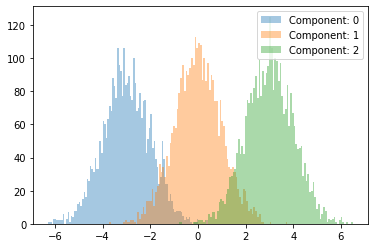

In [2]:
def generate_mixture(n_components, size, mus=[-3,0,3],sigmas=[1,1,1]):
    assert(n_components == len(mus) == len(sigmas))
    # WRITE YOUR CODE HERE
    # X-samples, y - components
    return X, y

n_components = 3
size = 10000
data_X, data_y = generate_mixture(n_components, size)
data_X = np.expand_dims(data_X,1)
for component in range(n_components):
    plt.hist(data_X[data_y==component], bins=100, label=f'Component: {component}', alpha=0.4);
plt.legend();

## KDE

**K**ernel **D**ensity **E**stimation is density-estimation method based on nearest neighbours:
$$p(x)=\frac{1}{N}\Sigma_{i=1}^NK(x_i,x)$$
where $0\leq K(x_i,x)\leq1$

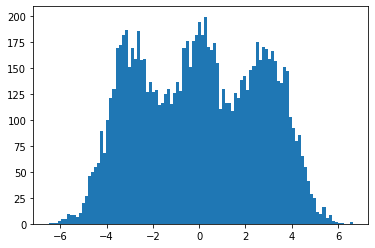

In [3]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
kde.fit(data_X) # train model
plt.hist(kde.sample(10000), bins=100); # visualize new samples from model

**Advantages of KDE**:
* does not requires number of the components

**Drawbacks of KDE**: 
* has to store all the training dataset in memory

## GMM

**G**aussian **M**ixture **M**odel is based on the representation of given data as several gaussians. To know from which gaussian each sample is taken **EM** algorithm is used. It consists of 2 steps:
* ***E(xpectation)-step*** - estimate probability for each i'th sample to be taken from the j'th gaussian $$g_{ij}=\frac{w_j\mathcal{N}(x_i|\mu_j,\sigma_j)}{\Sigma_jw_j\mathcal{N}(x_i|\mu_j,\sigma_j)}$$
* ***M(aximization)-step*** - estimate parameters of gaussians ($\mu$ and $\sigma$) maximizing the likelihood
$$w_j=\frac{1}{N}\Sigma_{i=1}^N g_{ij}$$
$$\mu_j=\frac{1}{Nw_j}\Sigma_{i=1}^N g_{ij}x_i$$
$$\sigma^2_j=\frac{1}{Nw_j}\Sigma_{i=1}^N g_{ij}(x_i-\mu_j)^2$$
where N is a number of samples, $\mathcal{N}(x|\mu,\sigma)$ is normal distribution density with mean $\mu$ and variance $\sigma$ at point x


(*) In general, EM-algorithm is a technique of maximizing $\int p(X|\theta,T)p(T|X)dT$ w.t. $\theta$ instead of maximizing $p(X|\theta)$. On E-step we estimate $P(T|X)$, on M-step we maximize the integral looking for the best $\theta$

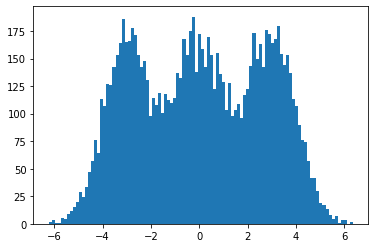

In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3) # define model
gmm.fit(data_X) # train model
plt.hist(gmm.sample(10000)[0],bins=100); # visualize new samples from model

**Advantages of GMM**:
* returns component for each sample
* memory-efficient

**Drawbacks of GMM**: 
* requires the exact number of components while training

# 2D example

Take any 2D dataset you want

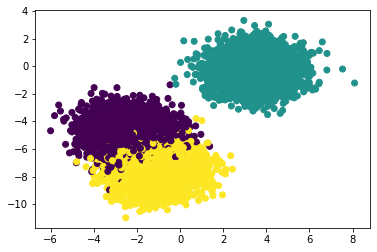

In [11]:
from sklearn.datasets import make_blobs

data_X, data_y = make_blobs(n_samples=10000)
plt.scatter(data_X[:,0],data_X[:,1],c=data_y);

Visualize estimated density

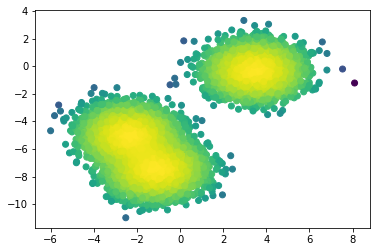

In [23]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(data_X)
plt.scatter(data_X[:,0],data_X[:,1],c=gmm.score_samples(data_X));

Visualize new samples

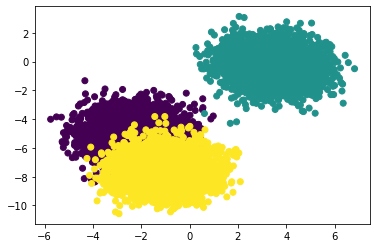

In [26]:
samples, component = gmm.sample(10000)
plt.scatter(samples[:,0],samples[:,1], c=component);

## Images

**Task**: try to sample images (mnist or cifar) using KDE and GMM

In [27]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True) # MNIST
# WRITE YOUR CODE HERE

# Links
[EM-algorithm (rus)](http://www.machinelearning.ru/wiki/index.php?title=EM-алгоритм)